# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import warnings
warnings.filterwarnings('ignore')
import os
from pathlib import Path
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from newsapi import NewsApiClient
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to /home/wh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
load_dotenv()

True

In [3]:
# Read your api key environment variable
# YOUR CODE HERE!
key = os.getenv("news_api_key")
type(key)

str

In [4]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key = key)

In [5]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_articles = newsapi.get_everything(q = 'Bitcoin', language = 'en')
len(btc_articles)

3

In [6]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_articles = newsapi.get_everything(q = 'Ethereum', language = 'en')
len(eth_articles)

3

In [7]:
# Create function to get sentiments from a dictionary of articles from newsapi
def get_sentiments(dictionary):
    results = []
    for x in dictionary['articles']:
        title = x['title']
        text = x["content"]
        date = x["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        positive = sentiment['pos']
        neutral = sentiment['neu']
        negative = sentiment['neg']
        results.append({
            'Title': title,
            'Text': text,
            'Date': date,
            'Compound': compound,
            'Positive': positive,
            'Neutral': neutral,
            'Negative': negative
        })
    
    return pd.DataFrame(results)

In [8]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
btc_sentiments = get_sentiments(btc_articles)
btc_sentiments.tail()

,Title,Text,Date,Compound,Positive,Neutral,Negative
15,Gold is Dead? Should You Opt for Gold (Over Cr...,This story originally appeared on MarketBeatWh...,2021-06-22,0.0772,0.084,0.841,0.075
16,"UPDATE 1-Bitcoin rises 9.8% to $39,035 - Reuters","By Reuters Staff\r\n(Adds context, background)...",2021-06-13,0.0000,0.000,1.000,0.000
17,Cryptocurrencies tumble amid China crackdown o...,"TOKYO, June 21 (Reuters) - Cryptocurrencies tu...",2021-06-21,-0.2732,0.000,0.942,0.058
18,"Boom, bust and bewildered: Bitcoin's year so f...",A representation of virtual currency Bitcoin i...,2021-06-30,0.0000,0.000,1.000,0.000
19,Bitcoin rises 8.5 percent to $36265 - Reuters,"Bitcoin surged 8.54 % to $36,265 on Wednesday,...",2021-06-09,-0.2732,0.000,0.938,0.062


In [9]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
eth_sentiments = get_sentiments(eth_articles)
eth_sentiments.tail()

,Title,Text,Date,Compound,Positive,Neutral,Negative
15,Bitcoin rises 9.8 percent to $39035 - Reuters,"Bitcoin surged 9.83 % to $39,035.47 at 22:05 G...",2021-06-13,-0.2732,0.0,0.94,0.06
16,"Bitcoin falls 8.5% to $31,700 - Reuters",By Reuters Staff\r\nJune 25 (Reuters) - Bitcoi...,2021-06-25,-0.3818,0.0,0.92,0.08
17,"Bitcoin rises 9.8 percent to $39,035 - Reuters",By Reuters Staff\r\nJune 13 (Reuters) - Bitcoi...,2021-06-13,0.0000,0.0,1.00,0.00
18,Bitcoin rises 5.1 percent to $37361 - Reuters,"Bitcoin rose 5.11 % to $37,360.63 at 18:10 GMT...",2021-06-13,-0.2732,0.0,0.94,0.06
19,"Bitcoin rises 5.1 percent to $37,361 - Reuters",By Reuters Staff\r\nJune 13 (Reuters) - Bitcoi...,2021-06-13,0.0000,0.0,1.00,0.00


In [10]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_sentiments.describe()

,Compound,Positive,Neutral,Negative
count,20.000000,20.000000,20.000000,20.000000
mean,0.104660,0.068550,0.895400,0.036000
std,0.377301,0.069756,0.084808,0.053666
min,-0.612400,0.000000,0.705000,0.000000
25%,-0.050575,0.000000,0.840250,0.000000
50%,0.128000,0.060500,0.923500,0.000000
75%,0.289900,0.105500,0.955500,0.059000
max,0.840200,0.282000,1.000000,0.184000


In [11]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_sentiments.describe()

,Compound,Positive,Neutral,Negative
count,20.000000,20.000000,20.000000,20.000000
mean,0.063475,0.040500,0.934350,0.025150
std,0.356132,0.058708,0.053135,0.032347
min,-0.381800,0.000000,0.806000,0.000000
25%,-0.273200,0.000000,0.920000,0.000000
50%,0.000000,0.000000,0.936500,0.000000
75%,0.361200,0.074750,0.961000,0.060250
max,0.771700,0.194000,1.000000,0.080000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin: 0.076250

Q: Which coin had the highest compound score?

A: Bitcoin: 0.840200

Q. Which coin had the highest positive score?

A: Bitcoin: 0.282000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/wh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/wh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
# YOUR CODE HERE!
stopwords = set(stopwords.words('english'))
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
addon = {'bitcoi', 'char', 'u', 'el'}
sw = stopwords.union(addon)

In [14]:
# Tokenizes Text from DataFrame
def tokenizer(df):
    regex = re.compile("[^a-zA-Z]")
    df['Tokens'] = ""

    for i in range(len(df)):
        
        # Remove the punctuation from text
        clean = regex.sub(" ", df['Text'].loc[i])
        
        # Tokenizes text
        words = word_tokenize(clean)
        
        # Convert the words to lowercase & Remove the stop words
        words_lower = [x.lower() for x in words if x.lower() not in sw]
        # Lemmatize words into root words
        words_lemmatized = [lemmatizer.lemmatize(x) for x in words_lower]
        df['Tokens'][i] = words_lemmatized
    
    return df

In [15]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
btc_tokenized = tokenizer(btc_sentiments)
btc_tokenized.head()

,Title,Text,Date,Compound,Positive,Neutral,Negative,Tokens
0,El Salvador becomes the first country to appro...,El Salvador's President Nayib Bukele has made ...,2021-06-09,0.8402,0.282,0.718,0.000,"[salvador, president, nayib, bukele, made, goo..."
1,El Salvador Becomes First Country to Recognize...,El Salvador has become the first country in th...,2021-06-09,0.1280,0.043,0.957,0.000,"[salvador, become, first, country, world, reco..."
2,Elon Musk says Tesla will resume Bitcoin purch...,"It's all about clean energy, it seems. \r\nElo...",2021-06-14,0.6908,0.169,0.831,0.000,"[clean, energy, seems, elon, musk, tesla, caus..."
3,Kaseya ransomware attackers demand $70 million...,Filed under:\r\nThe supply chain attack has re...,2021-07-05,-0.5719,0.111,0.705,0.184,"[filed, supply, chain, attack, reached, thousa..."
4,Bitcoin: El Salvador makes cryptocurrency lega...,image captionThe move means bitcoin will be ac...,2021-06-09,0.2732,0.060,0.940,0.000,"[image, captionthe, move, mean, bitcoin, accep..."


In [16]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth_tokenized = tokenizer(eth_sentiments)
eth_tokenized.tail()

,Title,Text,Date,Compound,Positive,Neutral,Negative,Tokens
15,Bitcoin rises 9.8 percent to $39035 - Reuters,"Bitcoin surged 9.83 % to $39,035.47 at 22:05 G...",2021-06-13,-0.2732,0.0,0.94,0.06,"[bitcoin, surged, gmt, sunday, adding, previou..."
16,"Bitcoin falls 8.5% to $31,700 - Reuters",By Reuters Staff\r\nJune 25 (Reuters) - Bitcoi...,2021-06-25,-0.3818,0.0,0.92,0.08,"[reuters, staff, june, reuters, bitcoin, dippe..."
17,"Bitcoin rises 9.8 percent to $39,035 - Reuters",By Reuters Staff\r\nJune 13 (Reuters) - Bitcoi...,2021-06-13,0.0000,0.0,1.00,0.00,"[reuters, staff, june, reuters, bitcoin, surge..."
18,Bitcoin rises 5.1 percent to $37361 - Reuters,"Bitcoin rose 5.11 % to $37,360.63 at 18:10 GMT...",2021-06-13,-0.2732,0.0,0.94,0.06,"[bitcoin, rose, gmt, sunday, adding, previous,..."
19,"Bitcoin rises 5.1 percent to $37,361 - Reuters",By Reuters Staff\r\nJune 13 (Reuters) - Bitcoi...,2021-06-13,0.0000,0.0,1.00,0.00,"[reuters, staff, june, reuters, bitcoin, rose,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
btc_tokens = []
[btc_tokens.append(btc_tokenized['Tokens'][x]) for x in range(len(btc_tokenized))]
btc_tokens = [item for sublist in btc_tokens for item in sublist if item not in sw]
btc_ngrams = Counter(ngrams(btc_tokens, n = 2))
btc_ngrams

Counter({('salvador', 'president'): 1,
         ('president', 'nayib'): 2,
         ('nayib', 'bukele'): 2,
         ('bukele', 'made'): 1,
         ('made', 'good'): 1,
         ('good', 'promise'): 1,
         ('promise', 'adopt'): 1,
         ('adopt', 'bitcoin'): 1,
         ('bitcoin', 'legal'): 6,
         ('legal', 'tender'): 5,
         ('tender', 'official'): 1,
         ('official', 'central'): 1,
         ('central', 'american'): 3,
         ('american', 'country'): 1,
         ('country', 'congress'): 1,
         ('congress', 'voted'): 1,
         ('voted', 'accept'): 1,
         ('accept', 'cryptocurrency'): 1,
         ('cryptocurrency', 'majori'): 1,
         ('majori', 'salvador'): 1,
         ('salvador', 'become'): 2,
         ('become', 'first'): 2,
         ('first', 'country'): 2,
         ('country', 'world'): 2,
         ('world', 'recognize'): 1,
         ('recognize', 'cryptocurrency'): 1,
         ('cryptocurrency', 'bitcoin'): 1,
         ('legal', 'currency'

In [19]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
eth_tokens = []
[eth_tokens.append(eth_tokenized['Tokens'][x]) for x in range(len(eth_tokenized))]
eth_tokens = [item for sublist in eth_tokens for item in sublist if item not in sw]
eth_ngrams = Counter(ngrams(eth_tokens, n = 2))
eth_ngrams

Counter({('tl', 'dr'): 1,
         ('dr', 'cryptocurrency'): 1,
         ('cryptocurrency', 'ethereum'): 5,
         ('ethereum', 'solidity'): 2,
         ('solidity', 'blockchain'): 2,
         ('blockchain', 'developer'): 2,
         ('developer', 'bundle'): 2,
         ('bundle', 'sale'): 1,
         ('sale', 'june'): 1,
         ('june', 'saving'): 1,
         ('saving', 'list'): 1,
         ('list', 'price'): 1,
         ('price', 'everyone'): 1,
         ('everyone', 'know'): 1,
         ('know', 'investing'): 1,
         ('investing', 'cryptocurrency'): 1,
         ('cryptocurrency', 'long'): 1,
         ('long', 'ago'): 1,
         ('ago', 'average'): 1,
         ('average', 'person'): 1,
         ('person', 'clue'): 1,
         ('clue', 'nft'): 1,
         ('nft', 'nowadays'): 1,
         ('nowadays', 'making'): 1,
         ('making', 'headline'): 1,
         ('headline', 'selling'): 1,
         ('selling', 'hundred'): 1,
         ('hundred', 'thousand'): 1,
         ('thousan

In [20]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(btc_tokens)

[('bitcoin', 19),
 ('reuters', 11),
 ('salvador', 9),
 ('legal', 6),
 ('june', 6),
 ('tender', 5),
 ('country', 5),
 ('image', 5),
 ('cryptocurrency', 4),
 ('first', 4)]

In [22]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(eth_tokens)

[('cryptocurrency', 16),
 ('bitcoin', 16),
 ('world', 11),
 ('ethereum', 8),
 ('biggest', 8),
 ('network', 7),
 ('previous', 7),
 ('close', 7),
 ('best', 7),
 ('known', 7)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

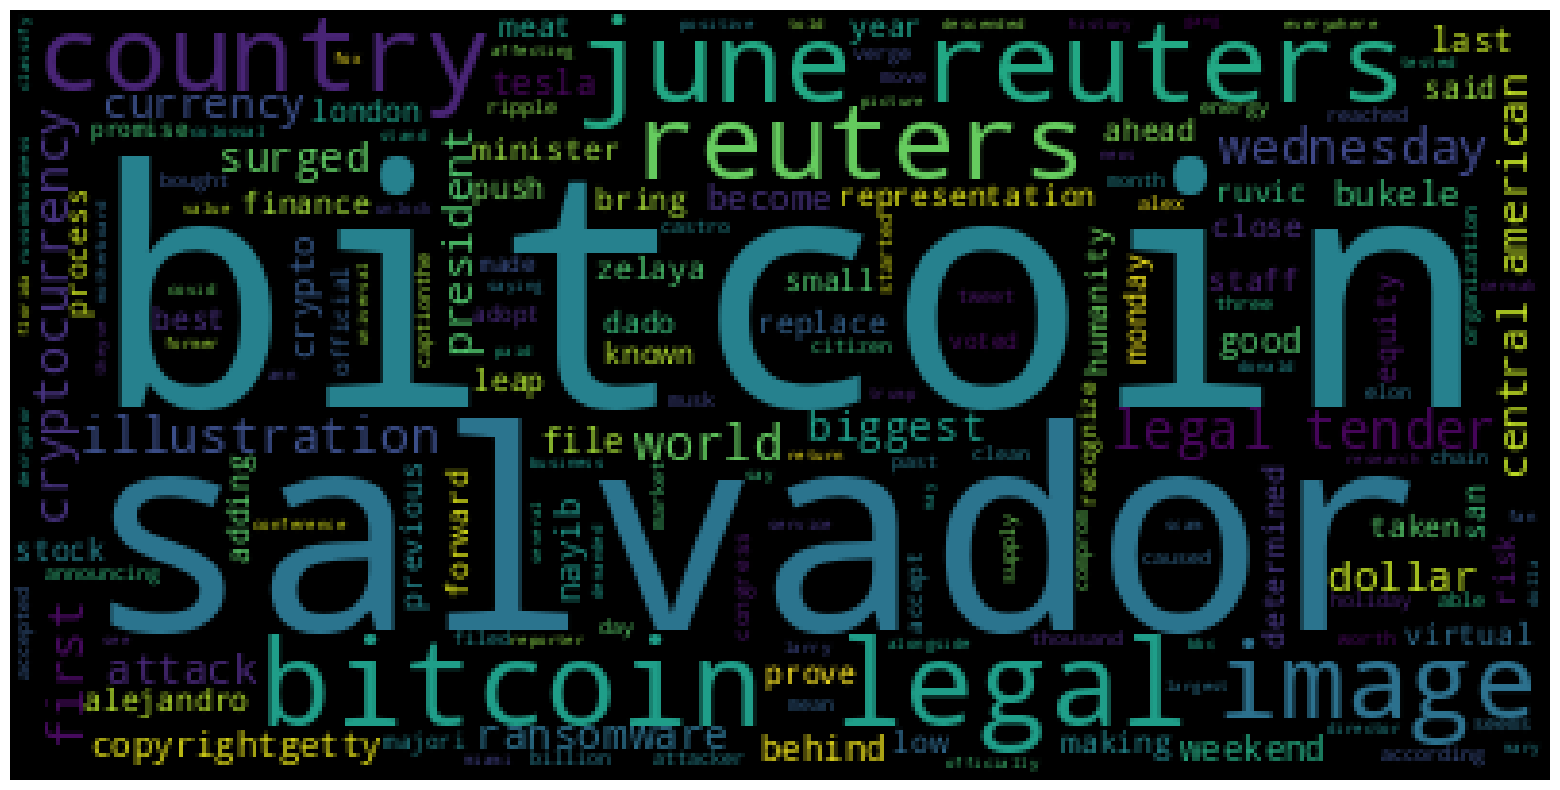

In [24]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
big_string = ' '.join(btc_tokens)
wc = WordCloud().generate(big_string)
plt.grid(b = None)
plt.axis('off')
plt.imshow(wc)
plt.savefig('Images/btc-word-cloud.png', bbox_inches='tight',pad_inches = 0)

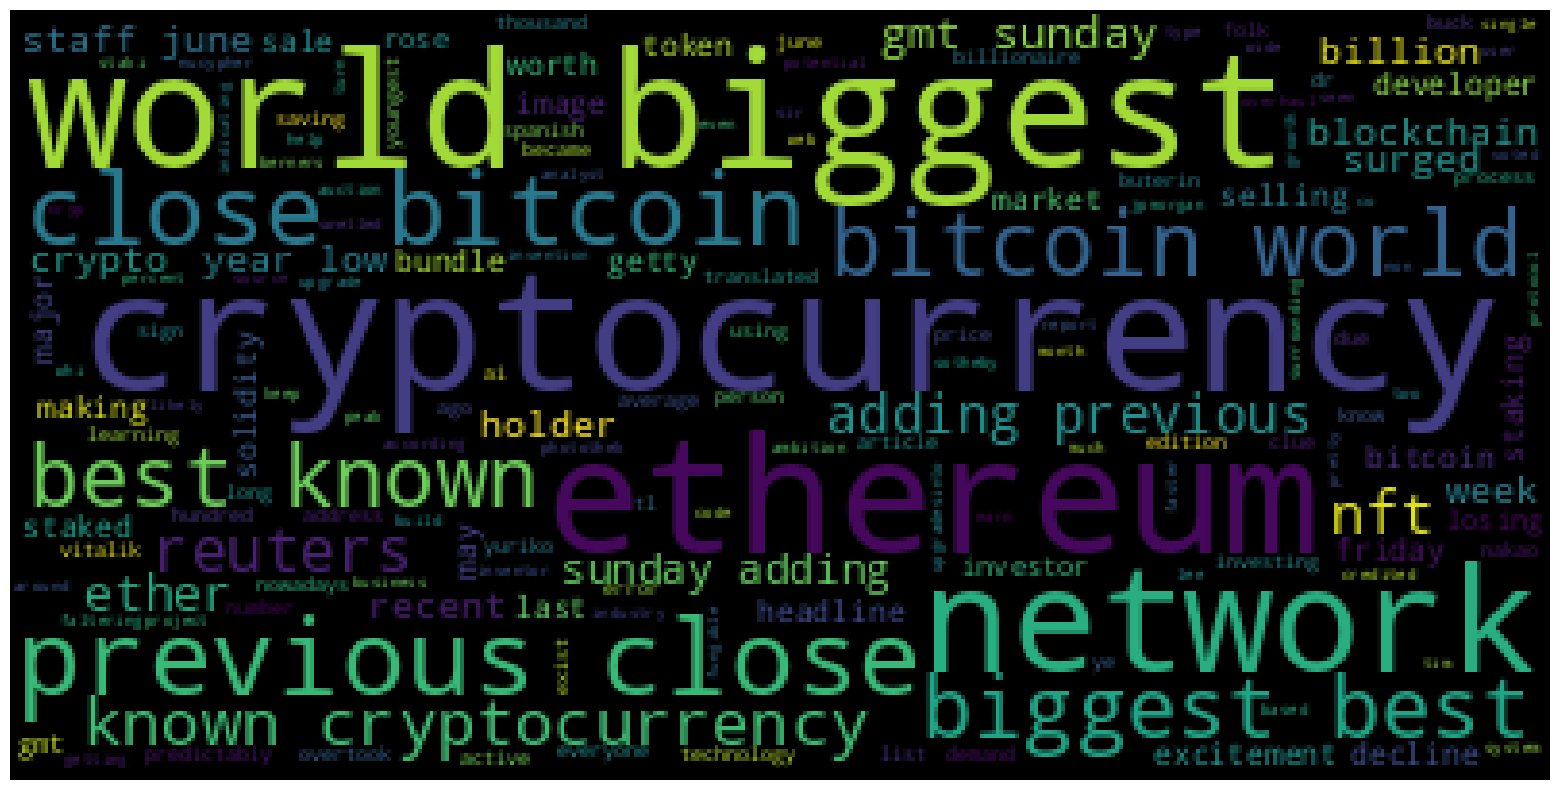

In [25]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
big_string = ' '.join(eth_tokens)
wc = WordCloud().generate(big_string)
plt.grid(b = None)
plt.axis('off')
plt.imshow(wc)
plt.savefig('Images/eth-word-cloud.png', bbox_inches='tight',pad_inches = 0)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [29]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
btc_text = ' '.join(btc_sentiments['Text'])

In [30]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
btc_doc = nlp(btc_text)
# Add a title to the document
# YOUR CODE HERE!
btc_doc.user_data["title"] = "Bitcoin Text Named Entity Recognition"

In [31]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(btc_doc, style = 'ent')

In [32]:
# List all Entities
# YOUR CODE HERE!
[(x.text, x.label_) for x in btc_doc.ents]

[("El Salvador's", 'GPE'),
 ('Nayib Bukele', 'PERSON'),
 ('Central American', 'NORP'),
 ('El Salvador', 'GPE'),
 ('first', 'ORDINAL'),
 ('Nayib Bukele', 'PERSON'),
 ('Wednesday', 'DATE'),
 ('Citizens', 'ORG'),
 ('Elon Musk', 'PERSON'),
 ('Tesla', 'PERSON'),
 ('the past few months', 'DATE'),
 ('first', 'ORDINAL'),
 ('Tesla', 'ORG'),
 ('$1.5 billion', 'MONEY'),
 ('Alex Castro', 'PERSON'),
 ('Verge', 'ORG'),
 ('Three days', 'DATE'),
 ('the holiday weekend', 'DATE'),
 ('US', 'GPE'),
 ('El Salvador', 'GPE'),
 ('first', 'ORDINAL'),
 ('Bitcoin', 'PERSON'),
 ('Miami', 'GPE'),
 ('Florida', 'GPE'),
 ('last weekend', 'DATE'),
 ('covid-19', 'PERSON'),
 ('Larry Cermak', 'PERSON'),
 ('Mary-Ann RussonBusiness', 'PERSON'),
 ('BBC News', 'ORG'),
 ('US', 'GPE'),
 ('Donald Trump', 'PERSON'),
 ('Fox Business', 'ORG'),
 ('Bitcoin', 'PERSON'),
 ('US', 'GPE'),
 ('$70m', 'MONEY'),
 ('£50.5m', 'MONEY'),
 ('Bitcoin', 'PERSON'),
 ('Bitcoin', 'PERSON'),
 ('May 20, 2021', 'DATE'),
 ('June 16', 'DATE'),
 ('Reuters'

---

### Ethereum NER

In [33]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
eth_text = ' '.join(eth_sentiments['Text'])

In [34]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_doc = nlp(eth_text)
# Add a title to the document
# YOUR CODE HERE!
eth_doc.user_data['title'] = "Ethereum Text Named Entity Recognition"

In [35]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_doc, style = 'ent')

In [36]:
# List all Entities
# YOUR CODE HERE!
[(x.text, x.label_) for x in eth_doc.ents]

[('21.25', 'MONEY'),
 ('June 17', 'DATE'),
 ('97%', 'PERCENT'),
 ('NFT', 'ORG'),
 ('hundreds of thousands', 'CARDINAL'),
 ('Spanish', 'NORP'),
 ('AI', 'ORG'),
 ('Last May', 'DATE'),
 ('Buterin', 'PERSON'),
 ('27', 'CARDINAL'),
 ('Yuriko Nakao', 'PERSON'),
 ('Friday', 'DATE'),
 ('more than $13 billion', 'MONEY'),
 ('2.0', 'CARDINAL'),
 ('Photothek/Getty Images', 'PERSON'),
 ('more than $13 billion', 'MONEY'),
 ('2.0', 'CARDINAL'),
 ('$40 billion', 'MONEY'),
 ('2025', 'DATE'),
 ('JPMorgan', 'ORG'),
 ('Tim Berners-Lee', 'PERSON'),
 ('NFT', 'ORG'),
 ("Sotheby's", 'ORG'),
 ('NFT', 'ORG'),
 ('Two', 'CARDINAL'),
 ('Keep Network', 'ORG'),
 ('Last week', 'DATE'),
 ('NFT', 'ORG'),
 ('as much as', 'CARDINAL'),
 ('90 percent', 'PERCENT'),
 ('recent weeks', 'DATE'),
 ('recent months', 'DATE'),
 ('8.54 %', 'PERCENT'),
 ('36,265', 'MONEY'),
 ('Wednesday', 'DATE'),
 ('2,853.31', 'MONEY'),
 ('Bitcoin', 'PERSON'),
 ('30.8%', 'PERCENT'),
 ('year', 'DATE'),
 ('27,734', 'MONEY'),
 ('Jan.', 'DATE'),
 ('Bitc

---